In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# EDA

In [31]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df.columns = df.columns.str.lower()
df.index.name = 'id'
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [33]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
# columns with NA
df.isnull().sum().to_frame()

,0
survived,0
pclass,0
name,0
sex,0
age,177
sibsp,0
parch,0
ticket,0
fare,0
cabin,687


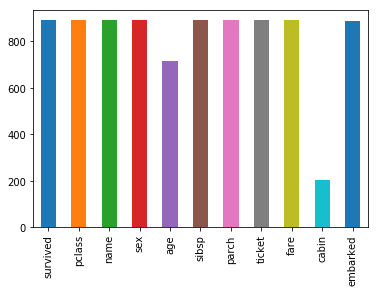

In [35]:
df.notnull().sum().plot(kind='bar')

In [36]:
df['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [37]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

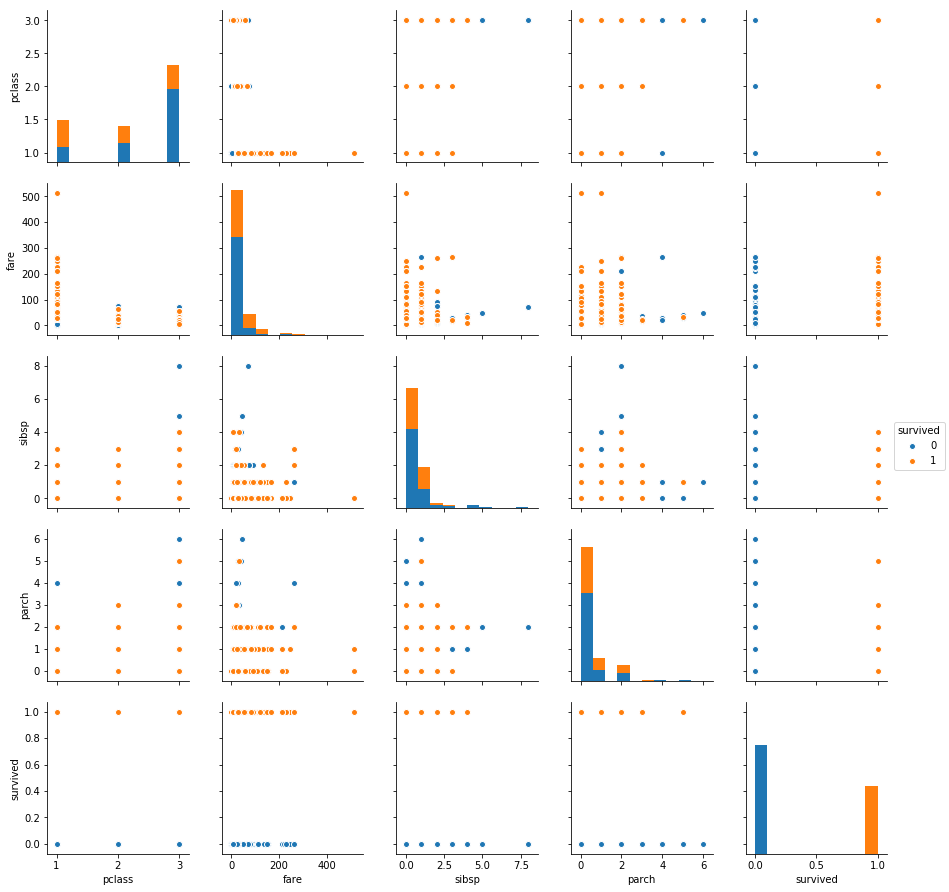

In [38]:
sns.pairplot(df[['pclass', 'sex', 'fare', 'sibsp', 'parch', 'survived']], hue='survived')

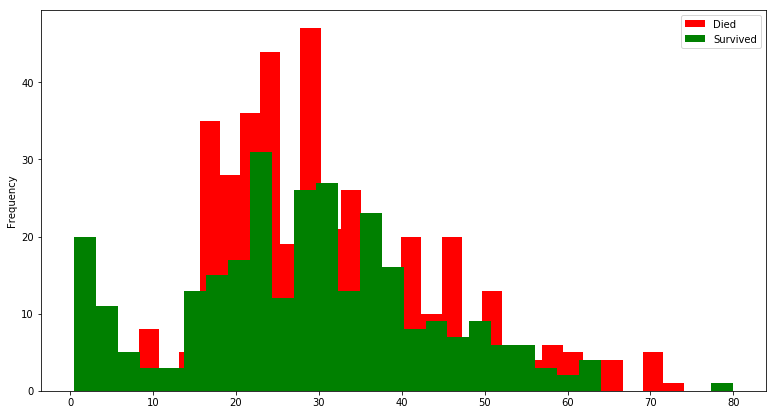

In [39]:
plt.figure(figsize=(13,7))
df[df['survived']==0]['age'].plot(bins=30, kind='hist', label='Died', color='red') 
df[df['survived']==1]['age'].plot(bins=30, kind='hist', label='Survived', color='green') 
plt.legend()

## Transform

In [40]:
df2 = df.copy()

### Missing Age

In [41]:
df2['age'].head(10)

id
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: age, dtype: float64

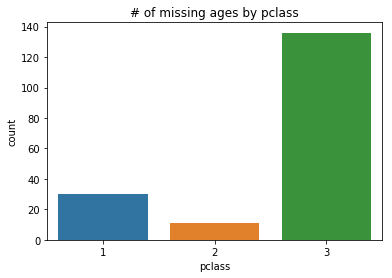

In [42]:
sns.countplot(x=df2[df2['age'].isnull()]['pclass'])
plt.title('# of missing ages by pclass')
plt.show()

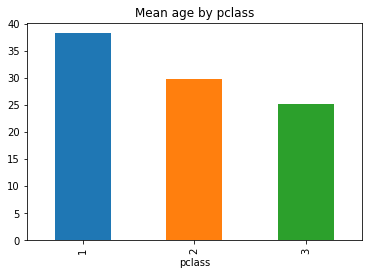

In [43]:
mean_ages_by_pclass = df2.groupby('pclass')['age'].mean()
mean_ages_by_pclass.plot(kind='bar', title='Mean age by pclass')

In [44]:
mean_ages_by_pclass

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [45]:
def update_age(row):
    if np.isnan(row['age']):
        return mean_ages_by_pclass[row['pclass']]
    else:
        return row['age']
    
df2['age'] = df2.apply(update_age, axis=1)

In [46]:
df2.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S


### Fare (missing on Test set)

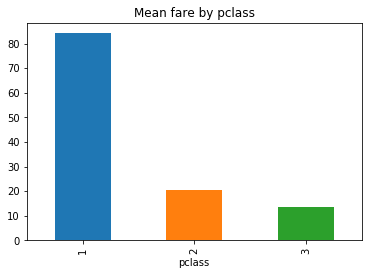

In [47]:
mean_fare_by_pclass = df2.groupby('pclass')['fare'].mean()
mean_fare_by_pclass.plot(kind='bar', title='Mean fare by pclass')

In [48]:
def impute_fare(row):
    if np.isnan(row['fare']):
        return mean_fare_by_pclass[row['pclass']]
    else:
        return row['fare']
    
df2['fare'] = df2.apply(impute_fare, axis=1)

### Mising Embarked

In [49]:
df2[df2['embarked'].isnull()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [50]:
df2 = pd.get_dummies(df2, columns=['embarked'])

In [51]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Categorical Sex

In [52]:
df2['female'] = ((df2['sex'] == 'female') * 1)

In [53]:
df2.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked_C', 'embarked_Q', 'embarked_S', 'female'],
      dtype='object')

## Family Size

In [92]:
def build_family_size(df):
    df['family_size'] = df['sibsp'] + df['parch'] + 1
    return df

df2 = build_family_size(df2)
 
# transform_functions.append(build_family_size)

Text(0.5,0,'Family Size')

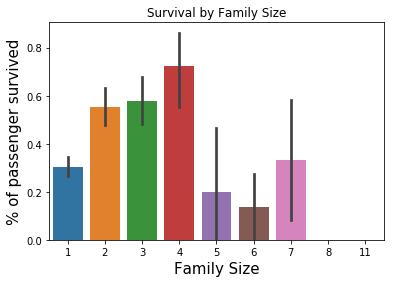

In [93]:
sns.barplot(x = "family_size", y = "survived", data=df)
plt.title("Survival by Family Size")
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Family Size",fontsize = 15)

In [95]:
# X = df[[ 'female', 'pclass', 'fare', 'sibsp', 'parch' ]]

features = [ 'female', 'pclass', 'fare', 'age', 'family_size' ] #, 'embarked_C', 'embarked_Q', 'embarked_S' ]
target = 'survived' 
cols = features + [ target ]

final_df = df2[cols]
X = df2[features]
y = df2[target]

## Classifiers Evaluation

In [96]:
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import train_test_split

def classifier_accuracy(classifier, X, y):    
    accuracies = []
    
    for train_index, test_index in RepeatedKFold(n_splits=5, n_repeats=5).split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = classifier().fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        accuracies.append((y_pred == y_test).sum() / len(y_test))

    return np.mean(accuracies)

In [97]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [ LogisticRegression, SVC, GradientBoostingClassifier, DecisionTreeClassifier, RandomForestClassifier ]

for classifier in classifiers:
    start_time = time.time()
    accuracy = classifier_accuracy(classifier, X, y)
    end_time = time.time()
    
    duration = end_time - start_time
    print("{}%  {}s  {}".format(round(accuracy*100,1), round(duration,2), classifier.__name__))

79.8%  0.08s  LogisticRegression
70.1%  0.38s  SVC
83.3%  1.18s  GradientBoostingClassifier
78.2%  0.05s  DecisionTreeClassifier
81.8%  0.34s  RandomForestClassifier


## Tune GradientBoosting

In [114]:
from sklearn.model_selection import GridSearchCV 
from sklearn import cross_validation, metrics

CV Accuracy Score : Mean - 0.8294501 | Std - 0.01522303 | Min - 0.8146067 | Max - 0.8483146


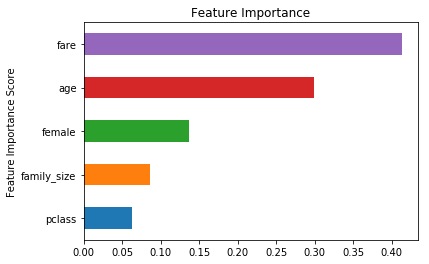

In [115]:
def modelfit(alg, dtrain, predictors, printFeatureImportance=True, cv_folds=5):
    target = 'survived'

    cv_score = cross_validation.cross_val_score(alg,
                                                dtrain[predictors],
                                                dtrain[target],
                                                cv=cv_folds,
                                                scoring='accuracy')

    print("CV Accuracy Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
        
    if printFeatureImportance:
        alg.fit(dtrain[predictors], dtrain[target])
        feat_imp = pd.Series(alg.feature_importances_,
                             predictors).sort_values()
        feat_imp.plot(kind='barh', title='Feature Importance')
        plt.ylabel('Feature Importance Score')


# Step 1
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, final_df, features)


In [116]:
# Step 2

target = 'survived'

param_test1 = {'n_estimators':range(20,200,5)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(final_df[features], final_df[target])

# gsearch1.grid_scores_, 
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 135}, 0.8047180159352461)

In [117]:
# Step 3

param_test2 = {'max_depth':range(8,18,1),
               'min_samples_split':range(120,280,20)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=gsearch1.best_params_['n_estimators'], max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2.fit(final_df[features],df[target])
# gsearch2.grid_scores_, 
gsearch2.best_params_, gsearch2.best_score_



({'max_depth': 17, 'min_samples_split': 160}, 0.8440127569919287)

CV Accuracy Score : Mean - 0.8440128 | Std - 0.01502706 | Min - 0.8268156 | Max - 0.8707865


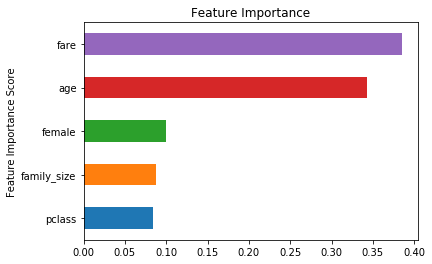

In [119]:
final_model = gsearch2.best_estimator_
modelfit(final_model, final_df, features)

# Submission

In [120]:
!head test.csv

In [121]:
test_df = pd.read_csv('test.csv', index_col='PassengerId')
test_df.columns = test_df.columns.str.lower()
test_df.index.name = 'id'
test_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Fix Age

In [122]:
def update_age(row):
    if np.isnan(row['age']):
        return mean_ages_by_pclass[row['pclass']]
    else:
        return row['age']
    
test_df['age'] = test_df.apply(update_age, axis=1)

#### Fix Embarked

In [123]:
test_df = pd.get_dummies(test_df, columns=['embarked'])

#### Fix Fare

In [124]:
def impute_fare(row):
    if np.isnan(row['fare']):
        return mean_fare_by_pclass[row['pclass']]
    else:
        return row['fare']
    
test_df['fare'] = test_df.apply(impute_fare, axis=1)

#### Fix Sex

In [125]:
test_df['female'] = ((test_df['sex'] == 'female') * 1)

### Family Size

In [126]:
test_df = build_family_size(test_df)

#### Select Features

In [127]:
features

['female', 'pclass', 'fare', 'age', 'family_size']

In [128]:
# features = [ 'female', 'pclass', 'fare', 'age', 'sibsp', 'parch', 'embarked_C', 'embarked_Q', 'embarked_S' ]
X_test = test_df[features]
X_test.head()

,female,pclass,fare,age,family_size
id,,,,,
892,0,3,7.8292,34.5,1
893,1,3,7.0000,47.0,2
894,0,2,9.6875,62.0,1
895,0,3,8.6625,27.0,1
896,1,3,12.2875,22.0,3


In [129]:
y_pred = final_model.predict(X_test)

In [130]:
!head gender_submission.csv

In [131]:
submission_df = pd.DataFrame({ 'PassengerId': X_test.index, 'Survived': y_pred }).set_index('PassengerId')
submission_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [132]:
submission_df.to_csv('remi_submission_new.csv')

In [133]:
submission_df['Survived'].value_counts()

0    267
1    151
Name: Survived, dtype: int64

### Compare Submissions

In [134]:
v1a = pd.read_csv('remi_submission_v1b.csv', index_col='PassengerId')
v1a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
Survived    418 non-null int64
dtypes: int64(1)
memory usage: 6.5 KB


In [135]:
(submission_df['Survived'] == v1a['Survived']).sum()

395

In [136]:
new_columns = list(test_df.columns) + [ 'v1b', 'new' ]
compare_df = pd.concat([ test_df, v1a, submission_df ], axis=1)
compare_df.columns = new_columns
compare_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked_C,embarked_Q,embarked_S,female,family_size,v1b,new
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0,1,0,0,1,0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,0,1,1,2,0,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0,1,0,0,1,0,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0,1,0,1,0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,0,1,1,3,0,0


In [137]:
compare_df[compare_df['v1b'] != compare_df['new']]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked_C,embarked_Q,embarked_S,female,family_size,v1b,new
PassengerId,,,,,,,,,,,,,,,,
913,3,"Olsen, Master. Artur Karl",male,9.00000,0,1,C 17368,3.1708,NaN,0,0,1,0,2,1,0
915,1,"Williams, Mr. Richard Norris II",male,21.00000,0,1,PC 17597,61.3792,NaN,1,0,0,0,2,1,0
942,1,"Smith, Mr. Lucien Philip",male,24.00000,1,0,13695,60.0000,C31,0,0,1,0,2,0,1
946,2,"Mangiavacchi, Mr. Serafino Emilio",male,29.87763,0,0,SC/A.3 2861,15.5792,NaN,1,0,0,0,1,1,0
956,1,"Ryerson, Master. John Borie",male,13.00000,2,2,PC 17608,262.3750,B57 B59 B63 B66,1,0,0,0,5,1,0
960,1,"Tucker, Mr. Gilbert Milligan Jr",male,31.00000,0,0,2543,28.5375,C53,1,0,0,0,1,0,1
982,3,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.00000,1,0,347072,13.9000,NaN,0,0,1,1,2,0,1
989,3,"Makinen, Mr. Kalle Edvard",male,29.00000,0,0,STON/O 2. 3101268,7.9250,NaN,0,0,1,0,1,0,1
990,3,"Braf, Miss. Elin Ester Maria",female,20.00000,0,0,347471,7.8542,NaN,0,0,1,1,1,0,1
